In [1]:
#!pip3 install networkx
#!pip3 install matplotlib

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import re

# Network Analysis

This group exercise is designed to develop an understanding of basic network measures and to start participants thinking about interesting research questions that can be enabled by network science.

<ol>
    <li>Divide yourselves into groups of four by counting off in order around the room.</li>
    <li>For 10 minutes, explore the <a href="https://icon.colorado.edu/#!/networks">Index of Complex Networks (ICON)</a> database and identify a network your group might like to investigate further.</li>
    <li>Write code to import this network into Python. Play with the <a href="https://networkx.github.io/documentation/stable/reference/algorithms/index.html">built-in functionality</a> of `networkx`. (See the code below for help with this step.)</li>
    <li>For 15 minutes, identify a possible research question using this data. Evaluate the strengths and weaknesses of this data.</li>
    <li>Outline a research design that could be used to address the weaknesses of the data you collected (e.g. think about possible data sets you could combine with this network), or otherwise improve your ability to answer the research question.</li>
</ol>

There is only one requirement: the group member with the least amount of experience coding should be responsible for typing the code into a computer. After 40 minutes you should be prepared to give a 3 minute presentation of your work. Remember that these daily exercises are for you to get to know each other better, are not expected to be fully-fleshed out research project, and a way for you to explore research areas that may be new to you.

## Importing ICON data

Visit the ICON website (<a href="https://icon.colorado.edu/#!/networks">link</a>). You can search the index using the checkboxes under the tabs "network domain," "subdomain," "graph properties," and "size". You can also type in keywords related to the network you would like to find. Here is a screenshot:

<img src="karate.png" width="500px" align="left"></img>

To download a network, click the small yellow downward arrow and follow the link listed under "source". Importing this data into Python using `networkx` will depend on the file type of the network you download. (Check out the <a href="https://networkx.github.io/documentation/stable/reference/readwrite/index.html">package's documentation</a> for how to import networks from different file types.) 

Here's what it looks like to import the [Zachary Karate Club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) from the edglist provided:

In [3]:
with open('karate_edges_77.txt', 'rb') as file: 
    karate_club = nx.read_edgelist(file) # Read in the edges

groups = {}
with open('karate_groups.txt', 'r') as file:
    for line in file:
        [node, group] = re.split(r'\t+', line.strip())
        groups[node] = int(group)

nx.set_node_attributes(karate_club, name = 'group', values = groups) # Add attributes to the nodes (e.g. group membership)

## Introduction to `networkx`

For very small networks, it can be helpful to visualize the nodes and edges. Below we have colored the nodes with respect to their group within the karate club.

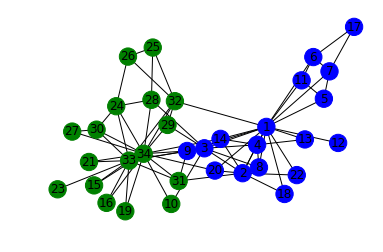

In [4]:
position = nx.spring_layout(karate_club)
nx.draw_networkx_labels(karate_club, pos = position) 

colors = [] # Color the nodes acording to their group
for attr in nx.get_node_attributes(karate_club, 'group').values():
    if attr == 1: colors.append('blue') 
    else: colors.append('green')
        
nx.draw(karate_club, position, node_color = colors) # Visualize the graph 

A natural question you might like to ask about a network, is what are the most "important" nodes? There are many definitions of network [importance or centrality](http://tuvalu.santafe.edu/~aaronc/courses/5352/csci5352_2017_L2.pdf). Here let's just consider one of the most straightforward measures: degree centrality -- the number of edges that start or end at a given node.

In [5]:
print([(n, karate_club.degree(n)) for n in karate_club.nodes()])

[('1', 16), ('2', 9), ('3', 10), ('4', 6), ('5', 3), ('6', 4), ('7', 4), ('8', 4), ('9', 5), ('11', 3), ('12', 1), ('13', 2), ('14', 5), ('18', 2), ('20', 3), ('22', 2), ('32', 6), ('31', 4), ('10', 2), ('28', 4), ('29', 3), ('33', 12), ('17', 2), ('34', 16), ('15', 2), ('16', 2), ('19', 2), ('21', 2), ('23', 1), ('24', 5), ('26', 3), ('30', 4), ('25', 3), ('27', 2)]


NetworkX can be used to return a normalized (divided by the maximum possible degree of the network) degree centrality for all nodes in the network.

In [6]:
degrees = nx.degree_centrality(karate_club)
print(degrees)

{'1': 0.48484848484848486, '2': 0.2727272727272727, '3': 0.30303030303030304, '4': 0.18181818181818182, '5': 0.09090909090909091, '6': 0.12121212121212122, '7': 0.12121212121212122, '8': 0.12121212121212122, '9': 0.15151515151515152, '11': 0.09090909090909091, '12': 0.030303030303030304, '13': 0.06060606060606061, '14': 0.15151515151515152, '18': 0.06060606060606061, '20': 0.09090909090909091, '22': 0.06060606060606061, '32': 0.18181818181818182, '31': 0.12121212121212122, '10': 0.06060606060606061, '28': 0.12121212121212122, '29': 0.09090909090909091, '33': 0.36363636363636365, '17': 0.06060606060606061, '34': 0.48484848484848486, '15': 0.06060606060606061, '16': 0.06060606060606061, '19': 0.06060606060606061, '21': 0.06060606060606061, '23': 0.030303030303030304, '24': 0.15151515151515152, '26': 0.09090909090909091, '30': 0.12121212121212122, '25': 0.09090909090909091, '27': 0.06060606060606061}


From both measures, we can see that nodes 1 and 34 have the highest degree. (These happen to be the two leaders from the two groups within the club.)

On large networks, you might want to look at the degree distribution of your network ...

In [7]:
# Enron email data set: http://snap.stanford.edu/data/email-Enron.html.
# (You can search "Email network (Enron corpus)" in ICON.)
with open('email_enron.txt', 'rb') as file: 
    enron = nx.read_edgelist(file, comments='#') # Read in the edges

In [8]:
print("Enron network contains {0} nodes, and {1} edges.".format(len(enron.nodes()), len(enron.edges())))

Enron network contains 36692 nodes, and 183831 edges.


Another network feature that you might like to know about your network, is how [assortative or modular](http://tuvalu.santafe.edu/~aaronc/courses/5352/csci5352_2017_L5.pdf) is it. Another way of asking this, is how likely is it for similar nodes to be connected to each other? This similarity can be measured along any number of network attributes. Here we ask, how much more likely are nodes from the same group within the karate club connected to each, than we would expect at random?

In [9]:
assort = nx.attribute_assortativity_coefficient(karate_club, 'group') 
print(assort)

0.7135125993573483
